goal is to chop up all long samples in a directory 
shorter ones and puts them into a new directory

In [177]:
import random
import numpy as np
import sounddevice as sd
import os
import librosa, librosa.display
from multiprocessing import Pool
sr=41000

23.25156462585034 17.531065759637187


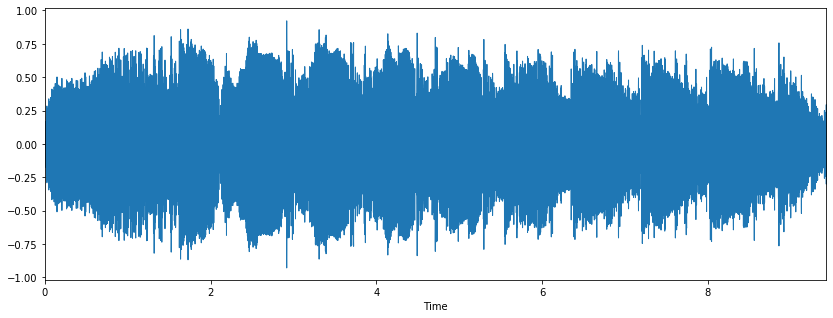

In [174]:
#this is how samples are trimmed
import matplotlib.pyplot as plt
import librosa.display
filepath='./to_be_chopped/noise/AA_JenCopicatNoise-16.wav'
y, sr = librosa.load(filepath,sr=sr)
plt.figure(figsize=(14, 5))
y=librosa.util.normalize(y)
yt, _= librosa.effects.trim(y,top_db=10)
print(librosa.get_duration(y), librosa.get_duration(yt))
librosa.display.waveplot(yt, sr=sr)


In [190]:
# a function that takes a long sample and chops it up
# we want samples to be of length 0.5-2 sec
#also I reverse the same sample  and chop it
def chop(y):
    y=y+y[::-1]
    l05=int(sr*0.5)
    l25=int(sr*2)
    frames=[]
    l=random.randint(l05,l25)
    while(len(y)>=l):
        frames.append(y[0:l])
        y=y[l:]
        l=random.randint(l05,l25)
    frames.append(y)
    return frames


In [193]:
print(os.getcwd())
for subdir, dirs, files in os.walk("./to_be_chopped/"):
    new_dir=os.getcwd()+"/chopped/"
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    label=subdir.split("/")[-1]
    new_dir=os.getcwd()+"/chopped/"+label
    if not os.path.exists(new_dir):
            os.mkdir(new_dir)        
    for f,file in  enumerate(files): 
        filepath = subdir + os.sep + file
        try:
            y, sr = librosa.load(filepath,sr=sr)
        except:
            continue
        yt, _= librosa.effects.trim(y,top_db=2)
        frames=chop(yt)
        for i,frame in enumerate(frames):
            chop_name=str(new_dir+"/"+str(f)+"_"+str(i)+".wav")
            librosa.output.write_wav(chop_name, frame, sr)


/home/amir/mir/synths/getting_data/making_data
